# PHYS 1600 HW1
Tim Zhao, B01307256, Feb 10, 2021

In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

## #1 
The Debye model of a solid is used to estimate the contribution of atomic vibrations (phonons) to the specific heat capacity. In the Debye model, the specific heat capacity of a solid is given by the following integral expression: 
$C_v=9k_B\bigg(\frac{T}{\theta_D}\bigg)\int_{0}^{\theta_D/T} \frac{x^4e^x}{(e^x-1)^2}dx$ 
where kB is Boltzmann’s constant and θD is the Debye temperature, a property of solids that depends on their density and atomic bonding strength.

a) Write a Python function to calculate $C_V$ for a given material and temperature. Your program should take the density, sample volume, Debye Temperature, temperature upper limit, and required accuracy as inputs, and output the heat capacity between $T = 0$ and the upper temperature limit. Use an adaptive Simpson’s rule to evaluate the integral to the required accuracy.

In [3]:
def adapt_simp(f, start, stop, accuracy, args=None):
    """
    f - function to integrate
    start - lower limit
    stop - upper limit
    accuracy - desired error range
    args - args passed to f, optional
    """
    
    #set initial h and error
    h = 0.1
    error = 100
    
    #find S0 w/ simpsons
    x_list = np.arange(start,stop+h,h)
    S = (1/3)*(f(start,*args)+f(stop,*args)+2*f(x_list[2:-2:2],*args).sum())
    T = (2/3)* f(x_list[1:-1:2],*args).sum()
    F_current = h*(S+2*T)

    while error > accuracy:
        F_last = F_current
        #half step size
        h /= 2
        x_list = np.arange(start,stop+h,h)
        
        #adaptive simpson
        S += T
        T = (2/3)* f(x_list[1:-1:2],*args).sum()

        F_current = h*(S+2*T)
        
        #check error
        error = abs((1/15)*(F_current-F_last))
    
    return (F_last, error)

In [5]:
""" 
#testing adaptive simpson w/ 1b.
def integrant(x,):
    g=(x**4*np.exp(x))/(np.exp(x)-1)**2
    return g

start = 0.001
stop = 10
x_list = np.arange(start, stop, 0.0001)
f_list = integrant(x_list)
actual = integrate.simpson(f_list, x_list)
print ('scipy', actual)

mine = adapt_simp(integrant, start, stop, 0.0001, args = [])
print('mine', mine)
"""

scipy 25.2736222712825
mine (25.274130627494436, 3.005787358271543e-07)


In [19]:
k_B=1.38 * 10**(-23)
Avogadro = 6.02 * 10**23.
def integrant(x):
    #intergrant of Debye model
    g=(x**4*np.exp(x))/(np.exp(x)-1)**2
    return g

def Debye(rho,V,molar_mass,theta_D,T_max,accuracy):
    """    
    rho - density in g/cm^3
    V - volume in cm^3
    molar_mass - molar mass in amu, to find N
    theta_D - Debye Temperature
    T_max - Temperature upper limit
    accuracy - required accuracy
    return array of Heat Capacity between T=0 and T_max
    """    
    #initialize empty lists to store data
    Cv_list=[]
    
    for T in np.arange(0,T_max,0.01):
        Cv=integrate.quad(integrant,0.001,(theta_D/T))#(rho*V)*9*k_B*Avogadro/molar_mass*(T/theta_D)**3*#adapt_simp(integrant, 0.0001,(theta_D/T), accuracy,[])[0]
        Cv_list.append(Cv)
    
    return Cv_list

<ipython-input-19-34f5f7a6a0ab>:22: RuntimeWarning: divide by zero encountered in double_scalars
  Cv=integrate.quad(integrant,0.001,(theta_D/T))#(rho*V)*9*k_B*Avogadro/molar_mass*(T/theta_D)**3*#adapt_simp(integrant, 0.0001,(theta_D/T), accuracy,[])[0]
<ipython-input-19-34f5f7a6a0ab>:5: RuntimeWarning: overflow encountered in double_scalars
  g=(x**4*np.exp(x))/(np.exp(x)-1)**2
<ipython-input-19-34f5f7a6a0ab>:5: RuntimeWarning: overflow encountered in exp
  g=(x**4*np.exp(x))/(np.exp(x)-1)**2
<ipython-input-19-34f5f7a6a0ab>:5: RuntimeWarning: invalid value encountered in double_scalars
  g=(x**4*np.exp(x))/(np.exp(x)-1)**2
<ipython-input-19-34f5f7a6a0ab>:22: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Cv=integrate.quad(integrant,0.001,(theta_D/T))#(rho*V)*9*k_B*Avogadro/molar_mass*(T/theta_D)**3*#adapt_simp(integrant, 0.0001,(theta_D/T), accuracy,[])[0]
<ipython-

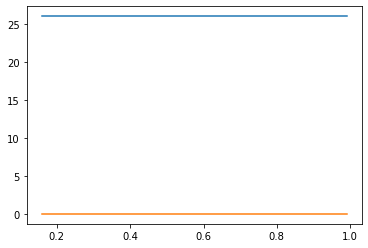

1


In [21]:
density=1
T_max=1
T_list=np.arange(0,T_max,0.01)
accuracy=0.01

Pb_rho=11.35
Pb_molar_mass=207.2
Pb_theta_D=105
Pb_Debye=Debye(Pb_rho, density, Pb_molar_mass,Pb_theta_D, T_max, accuracy)
plt.plot(T_list,Pb_Debye,label='Pb')

#Al_Debye=Debye(2.7,1,428,2000,0.0000001)
#diamond_Debye=Debye(3.51,1,2230,2000,0.0000001)
#print(Pb_Debye)

#plt.plot(Al_Debye,label='Al')
#plt.plot(Diamond_Debye,label='Diamond')
plt.show()
print('1')

In [26]:
#General ODE solver with Runge-Kutta 4
def RK4(f,t0,t_f,dt,x0, args=None):
    """
    f - a function, takes 2 variables (t,x), RHS of ODE
    t0 - lower limit of independent variable
    t_f - upper limit of independent variable
    dt - step size
    x0 - initial value 
    return - array of t and x
    """
    
    # number of time steps, n must be an integer
    n  = int(np.ceil((t_f-t0)/dt))
    
    # create empty lists to store values
    x_list=np.zeros(n, np.longdouble)
    t_list=np.zeros(x_list.size)
    
    # set initial conditions at time zero
    x_list[0] = x0
    t_list[0] = t0
    
    # RK4
    for ii in range(n-1):
            k1 = dt*f(x_list[ii],t_list[ii],*args)
            k2 = dt*f(x_list[ii]+0.5*k1,t_list[ii]+dt/2,*args)
            k3 = dt*f(x_list[ii]+0.5*k2,t_list[ii]+dt/2,*args)
            k4 = dt*f(x_list[ii]+0.5*k3,t_list[ii]+dt/2,*args)
            
            # update value of Q at each time step and step time by dt
            x_list[ii+1]=x_list[ii]+(k1+2*k2+2*k3+k4)/6
            t_list[ii+1]=t_list[ii]+dt
            
    return t_list, x_list

# #2
A simple electronic circuit with a resistor and capacitor is shown below.
A voltage is sent into the circuit on the left at $V_{in}$ and read out on the right at $V_{out}$.

a)Find the 1st order ordinary differential equation governing $V_{out}(t)$. Assume the output load impedance is infinite so that no current flows through it. Your equation should relate $dV_{out}/dt$ to $R$, $C$, and $V_{in} − V_{out}$.



$\frac{dQ}{dt}=I=\frac{V_{in}-V_{out}}{R}$

$V_{out}=\frac{Q}{C}$

$\frac{dQ}{dt}=\frac{d}{dt}V_{out}C$

$\frac{d}{dt}V_{out}=\frac{V_{in}-V_{out}}{RC}$

b) Use your RK4 integrator to solve the equation from (a) for a square wave input signal, with frequency 1 and amplitude 1. Make plots of Vout(t) from t = 0 to t = 10 when RC = 0.01, 0.1, and 1, with initial condition Vout(0) = 0. Be careful to select an appropriate time step size for your solution in each case.

In [32]:
#make sqaure wave
from scipy import signal

def circuit(V_out, t, RC):
    V_in = signal.square(2 * np.pi * t)
    return (V_in-V_out)/RC

T,RC1 = RK4(circuit, 0, 10, 0.001,0,[1])
#RC01 = RK4(circuit, 0.1,  0, 1, 0)
#RC001 = RK4(circuit, 0.01, 0, 10, 0)

# #3

Consider a radioactive decay involving two distinct types of nuclei, A and B, with populations NA(t) and NB(t). Suppose that the type A nuclei decay to form type B nuclei which decay in turn according to the differential equations

$\frac{dN_A}{dt}=-\frac{N_A}{\tau_A}$

$\frac{dN_B}{dt}=\frac{N_A}{\tau_A}-\frac{N_B}{\tau_B}$

where τA and τB are the decay time constants for each type of nucleus.

a) Use your RK4 integrator to numerically find the solution of these coupled equations for NA and NB as functions of time.

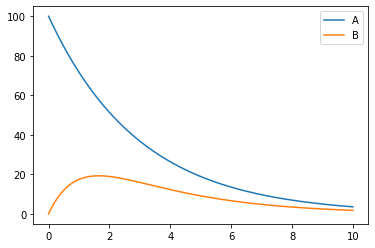

In [84]:
#define the 2 ODE
def fA(NA,t,tA):
    return -NA/tA

def fB(NB,t,tA,NA,tB):
    return (NA/tA)-(NB/tB)

#set constants and time range
tA=3
A0=100
tB=1
B0=0
t0=0
t_f=10
dt=0.01

#SOLVE coupled ODE
#number of time steps, n must be an integer
n  = int(np.ceil((t_f-t0)/dt)) 

# create empty lists to store values
A_list=np.zeros(n, np.longdouble)
B_list=np.zeros(A_list.size,np.longdouble)
t_list=np.zeros(A_list.size,np.longdouble)
    
# set initial conditions at time zero
A_list[0] = A0
B_list[0] = B0
t_list[0] = t0

# RK4
for ii in range(n-1): 
    
    #particle A
    A_k1 = dt*fA(A_list[ii],t_list[ii],tA)
    A_k2 = dt*fA(A_list[ii]+0.5*A_k1,t_list[ii]+dt/2,tA)
    A_k3 = dt*fA(A_list[ii]+0.5*A_k2,t_list[ii]+dt/2,tA)     
    A_k4 = dt*fA(A_list[ii]+0.5*A_k3,t_list[ii]+dt/2,tA)
    A_list[ii+1]=A_list[ii]+(A_k1+2*A_k2+2*A_k3+A_k4)/6   
 
    #particle B 
    B_k1 = dt*fB(B_list[ii],t_list[ii],tA,A_list[ii],tB )
    B_k2 = dt*fB(B_list[ii]+0.5*B_k1,t_list[ii]+dt/2,tA,A_list[ii],tB)
    B_k3 = dt*fB(B_list[ii]+0.5*B_k2,t_list[ii]+dt/2,tA,A_list[ii],tB)     
    B_k4 = dt*fB(B_list[ii]+0.5*B_k3,t_list[ii]+dt/2,tA,A_list[ii],tB)
    B_list[ii+1]=B_list[ii]+(B_k1+2*B_k2+2*B_k3+B_k4)/6
 
    #update time
    t_list[ii+1]=t_list[ii]+dt
            
plt.plot(t_list,A_list,label='A')
plt.plot(t_list,B_list,label='B')
plt.legend()
plt.show()

b) Find the analytic solution for NA(t) and NB(t) and compare with your numeric results. How accurate is your numeric solution?
see below

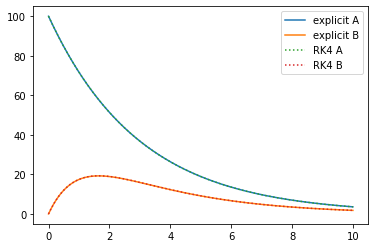

In [85]:
#explicit solution
def NA(t,A0,tA):
    return A0*np.exp(-t/tA)

def NB(t,A0,tA,B0,tB):
    return (A0*tB)/(tA-tB)*np.exp(-t/tA)+(B0+(A0*tB/(tB-tA)))*np.exp(-t/tB)

t_list = np.arange(t0,t_f,dt)
A =[]
B =[]

for t in t_list:
    A.append(NA(t, A0, tA))
    B.append(NB(t,A0,tA,B0,tB))

#compare RK4 and explicit solution
plt.plot(t_list,A,label='explicit A')
plt.plot(t_list,B, label='explicit B')
plt.plot(t_list,A_list,linestyle=':',label='RK4 A')
plt.plot(t_list,B_list, linestyle=':',label='RK4 B')
plt.legend()
plt.show()

c) Explore the behavior for different values of the ratio $\tau_A/\tau_B$ and find the important limits of $\tau_A/\tau_B$.